In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Hopper-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(241470, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(242326, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,16-07-2023 16:15:44,18,0,18,0.000895,1,19,True,12.490834,12.490834,12.490834,12.490834,12.490834,COMPER-DDPG
1,1,2,Hopper-v4,16-07-2023 16:15:46,19,0,19,0.000944,1,20,True,12.199935,12.345385,12.345385,12.345385,12.345385,COMPER-DDPG
2,1,3,Hopper-v4,16-07-2023 16:15:47,20,0,20,0.000994,1,21,True,11.731122,12.140630,12.140630,12.140630,12.140630,COMPER-DDPG
3,1,4,Hopper-v4,16-07-2023 16:15:48,21,0,21,0.001044,1,22,True,11.070795,11.873171,11.873171,11.873171,11.873171,COMPER-DDPG
4,1,5,Hopper-v4,16-07-2023 16:15:50,22,0,22,0.001093,1,23,True,10.214219,11.541381,11.541381,11.541381,11.541381,COMPER-DDPG


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,12-07-2023 12:29:27,34,35,0,0.001690,1,35,True,34.854722,34.854722,34.854722,34.854722,34.854722,DDPG
1,1,2,Hopper-v4,12-07-2023 12:29:27,35,36,0,0.001740,1,36,True,35.900351,35.377537,35.377537,35.377537,35.377537,DDPG
2,1,3,Hopper-v4,12-07-2023 12:29:27,36,37,0,0.001789,1,37,True,36.935252,35.896775,35.896775,35.896775,35.896775,DDPG
3,1,4,Hopper-v4,12-07-2023 12:29:27,37,38,0,0.001839,1,38,True,37.963334,36.413415,36.413415,36.413415,36.413415,DDPG
4,1,5,Hopper-v4,12-07-2023 12:29:27,38,39,0,0.001889,1,39,True,38.991210,36.928974,36.928974,36.928974,36.928974,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,16-07-2023 16:15:44,18,0,18,0.000895,1,19,True,12.490834,12.490834,12.490834,12.490834,12.490834,COMPER-DDPG
1,1,2,Hopper-v4,16-07-2023 16:15:46,19,0,19,0.000944,1,20,True,12.199935,12.345385,12.345385,12.345385,12.345385,COMPER-DDPG
2,1,3,Hopper-v4,16-07-2023 16:15:47,20,0,20,0.000994,1,21,True,11.731122,12.140630,12.140630,12.140630,12.140630,COMPER-DDPG
3,1,4,Hopper-v4,16-07-2023 16:15:48,21,0,21,0.001044,1,22,True,11.070795,11.873171,11.873171,11.873171,11.873171,COMPER-DDPG
4,1,5,Hopper-v4,16-07-2023 16:15:50,22,0,22,0.001093,1,23,True,10.214219,11.541381,11.541381,11.541381,11.541381,COMPER-DDPG


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
48665,5,48666,Hopper-v4,12-07-2023 20:14:07,49996,41424,0,0.999,50,997,True,1586.979913,687.516421,1586.964101,1589.517246,1583.670922,DDPG
48666,5,48667,Hopper-v4,12-07-2023 20:14:07,49997,41425,0,0.999,50,998,True,1587.663280,687.534917,1587.426888,1589.426216,1584.361903,DDPG
48667,5,48668,Hopper-v4,12-07-2023 20:14:07,49998,41426,0,0.999,50,999,True,1588.433163,687.553428,1587.862799,1589.346768,1585.082435,DDPG
48668,5,48669,Hopper-v4,12-07-2023 20:14:07,49999,41427,0,0.999,50,1000,True,1589.324425,687.571957,1588.271211,1589.271239,1585.841123,DDPG
48669,5,48670,Hopper-v4,12-07-2023 20:14:08,50000,41428,0,0.999,50,1001,True,1590.286528,687.590504,1588.652750,1589.194146,1586.634988,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

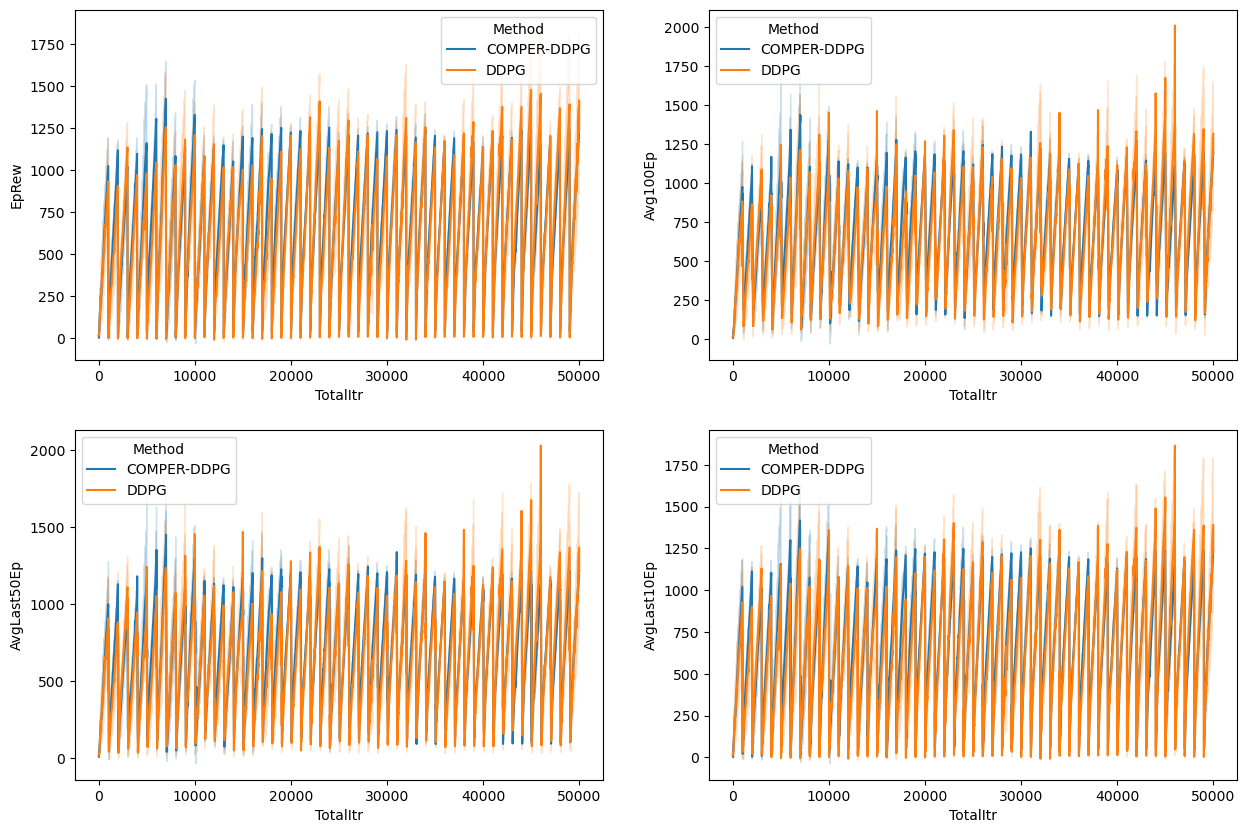

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,16-07-2023 18:51:12,Hopper-v4,5000,5.683376,COMPER-DDPG
1,1,16-07-2023 21:27:44,Hopper-v4,10000,5.379461,COMPER-DDPG
2,1,17-07-2023 00:05:17,Hopper-v4,15000,6.371467,COMPER-DDPG
3,1,17-07-2023 02:43:15,Hopper-v4,20000,6.389465,COMPER-DDPG
4,1,17-07-2023 05:21:41,Hopper-v4,25000,6.346438,COMPER-DDPG


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,6.244227
std,1.428571,14507.211437,0.490238
min,1.000000,5000.000000,4.123742
25%,2.000000,15000.000000,6.326546
50%,3.000000,27500.000000,6.409466
75%,4.000000,40000.000000,6.487008
max,5.000000,50000.000000,6.628627


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-07-2023 12:37:19,Hopper-v4,5000,1.892447,DDPG
1,1,12-07-2023 12:45:13,Hopper-v4,10000,2.558588,DDPG
2,1,12-07-2023 12:53:20,Hopper-v4,15000,1.808233,DDPG
3,1,12-07-2023 13:01:39,Hopper-v4,20000,2.018003,DDPG
4,1,12-07-2023 13:10:12,Hopper-v4,25000,2.869101,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,4.456818
std,1.428571,14507.211437,1.719682
min,1.000000,5000.000000,1.807917
25%,2.000000,15000.000000,3.245900
50%,3.000000,27500.000000,3.942549
75%,4.000000,40000.000000,6.365106
max,5.000000,50000.000000,6.604654


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

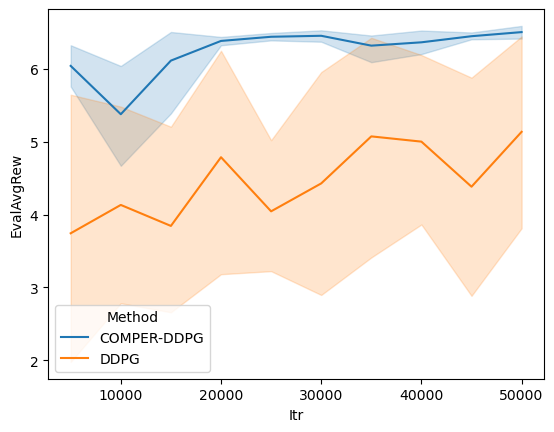

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,117,168.205415,COMPER-DDPG,58.389715
100,118,169.255788,COMPER-DDPG,59.957365
101,119,170.247650,COMPER-DDPG,61.537842
102,120,171.225836,COMPER-DDPG,63.132789
103,121,172.241406,COMPER-DDPG,64.744495


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,133,203.454503,DDPG,116.330557
100,134,205.465789,DDPG,118.036667
101,135,207.489625,DDPG,119.752560
102,136,209.526040,DDPG,121.478468
103,137,211.574876,DDPG,123.214583


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,117,168.205415,COMPER-DDPG,58.389715
100,118,169.255788,COMPER-DDPG,59.957365
101,119,170.247650,COMPER-DDPG,61.537842
102,120,171.225836,COMPER-DDPG,63.132789
103,121,172.241406,COMPER-DDPG,64.744495


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
48665,49996,1586.979913,DDPG,1586.964101
48666,49997,1587.663280,DDPG,1587.426888
48667,49998,1588.433163,DDPG,1587.862799
48668,49999,1589.324425,DDPG,1588.271211
48669,50000,1590.286528,DDPG,1588.652750


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

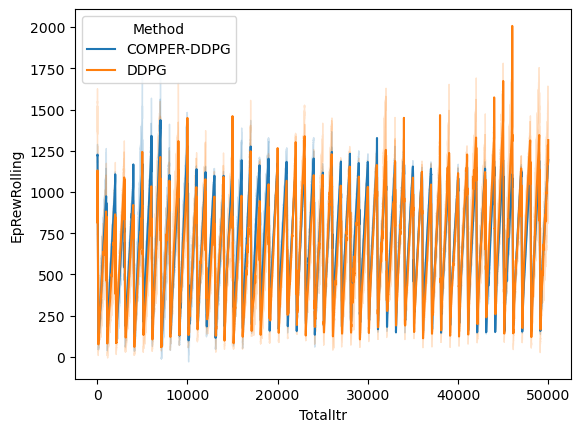

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,5.379461,COMPER-DDPG,5.531419
2,15000,6.371467,COMPER-DDPG,5.875464
3,20000,6.389465,COMPER-DDPG,6.380466
4,25000,6.346438,COMPER-DDPG,6.367951
5,30000,6.349401,COMPER-DDPG,6.347919


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.558588,DDPG,2.225518
2,15000,1.808233,DDPG,2.183410
3,20000,2.018003,DDPG,1.913118
4,25000,2.869101,DDPG,2.443552
5,30000,1.820245,DDPG,2.344673


<Axes: xlabel='Int', ylabel='EpRewRolling'>

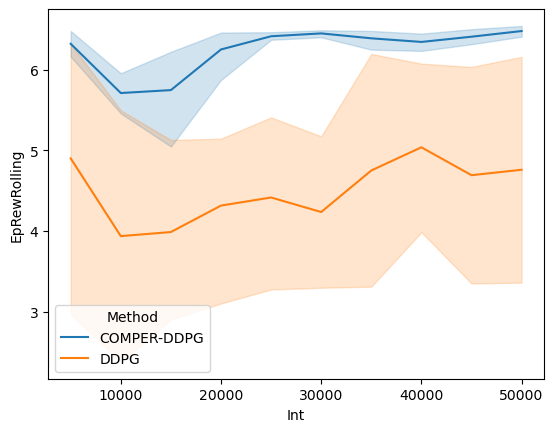

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

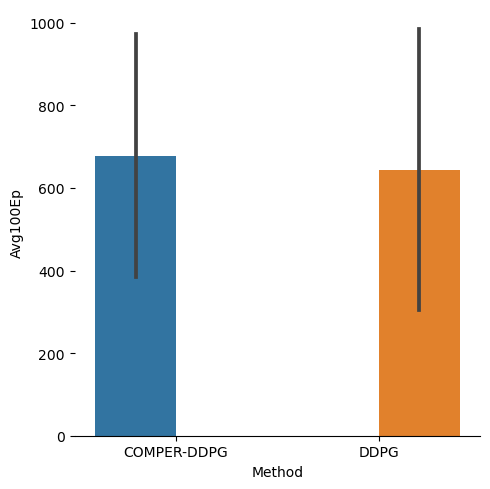

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

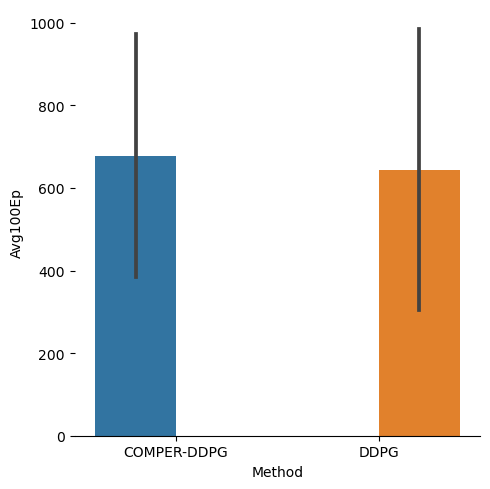

In [24]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)